# Condition-based solution

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score,
    ConfusionMatrixDisplay,
)

## Loading the data

In [2]:
train_df = pd.read_csv('../data/raw/loan-data.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
y_true = np.where(train_df.Loan_Status == 'Y', 1, 0)

## Conditions

1. If the applicant has a credit history, then the loan is approved

Income-to-Loan Amount Ratio = (ApplicantIncome + CoapplicantIncome) / (LoanAmount / Loan_Amount_Term)

In [4]:
train_df["Income_Amount_Ratio"] = (
    train_df.ApplicantIncome + train_df.CoapplicantIncome 
) / (train_df.LoanAmount / train_df.Loan_Amount_Term)

train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Amount_Ratio
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,17130.937500
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,16363.636364
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,14823.000000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,15319.148936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,14704.225352
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,18477.000000
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,11827.351779
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,14598.288770


In [5]:

y_pred = np.where(train_df.Credit_History == 1, 1, 0)

accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.7703583061889251
Recall:  0.8957345971563981
Precision:  0.7957894736842105


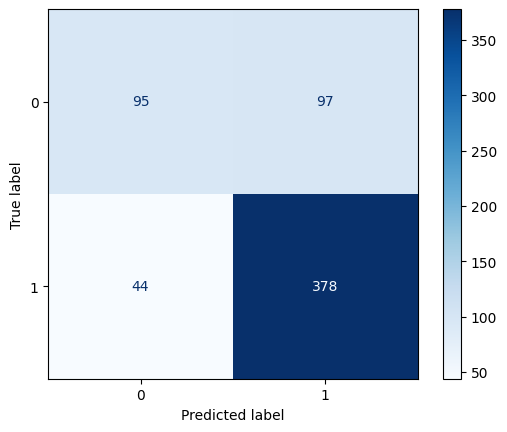

In [6]:
ConfusionMatrixDisplay.from_predictions(
    y_true, y_pred, cmap='Blues'
)